# 超参数调优和五折交叉验证

In [1]:
import paddle
# ==================== 设备设置 ====================
try:
    paddle.set_device('iluvatar_gpu:0')  # 依图加速卡设备
    print("使用依图加速卡 (iluvatar_gpu:0)")
except Exception as e:
    print(f"无法设置依图加速卡设备，使用CPU: {e}")
    paddle.set_device('cpu')

/opt/conda/envs/python35-paddle120-env/lib/python3.10/site-packages/paddle/utils/cpp_extension/extension_utils.py:719: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
I1225 19:32:26.690063  1210 init.cc:238] ENV [CUSTOM_DEVICE_ROOT]=/opt/conda/envs/python35-paddle120-env/lib/python3.10/site-packages/paddle_custom_device
I1225 19:32:26.690126  1210 init.cc:146] Try loading custom device libs from: [/opt/conda/envs/python35-paddle120-env/lib/python3.10/site-packages/paddle_custom_device]
I1225 19:32:26.811812  1210 custom_device_load.cc:51] Succeed in loading custom runtime in lib: /opt/conda/envs/python35-paddle120-env/lib/python3.10/site-packages/paddle_custom_device/libpaddle-iluvatar-gpu.so
I1225 19:32:26.811847  1210 custom_device_load.cc:58] Skipped lib [/opt/conda/envs/python35-paddle120-env/lib/pyth

使用依图加速卡 (iluvatar_gpu:0)


使用文泉驿中文字体

德国交通标志识别 - 超参数调优系统 (PaddlePaddle)
成员C任务：基于成员A&B的工作进行模型优化
包含过拟合/欠拟合分析和详细训练曲线

选择要优化的模型架构:
1. standard - 标准CNN模型
2. simple - 简单CNN模型
3. reference - 参考项目模型
使用模型类型: standard

超参数调优菜单
1. K折交叉验证 (评估模型稳定性，包含过拟合分析)
2. 随机搜索 (寻找最佳超参数)
3. 分层搜索 (推荐，更高效)
4. 查看当前最佳参数
5. 生成给成员B的参数建议
6. 退出

5-折交叉验证
评估模型: standard
配置: epochs=5, batch_size=32

加载预处理数据...
数据加载成功！
训练集: (27446, 64, 64, 3) - 27446 样本
验证集: (5881, 64, 64, 3) - 5881 样本
测试集: (5882, 64, 64, 3) - 5882 样本
Fold 1/5
准确率: 0.9920 | 损失: 0.0314 | 时间: 51.9s
Fold 2/5
准确率: 0.9875 | 损失: 0.0415 | 时间: 46.9s
Fold 3/5
准确率: 0.9905 | 损失: 0.0307 | 时间: 27.2s
Fold 4/5
准确率: 0.9925 | 损失: 0.0309 | 时间: 33.4s
Fold 5/5
准确率: 0.9902 | 损失: 0.0390 | 时间: 26.0s

5-折交叉验证结果
平均准确率: 0.9906 (99.06%)
标准差: 0.0017
各折准确率: ['0.9920', '0.9875', '0.9905', '0.9925', '0.9902']

过拟合/欠拟合分析:
Fold 1:
训练准确率: 0.9590
验证准确率: 0.9920
准确率差距: -0.0330 (欠拟合)
损失差距: -0.1027
建议: 增加模型复杂度、减少正则化、增加训练轮数

Fold 2:
训练准确率: 0.9597
验证准确率: 0.9875
准确率差距: -0.0278 (欠拟合)
损失差距: -0.0893
建议: 增加模型复杂度、减少正则化、增加训练轮数

F

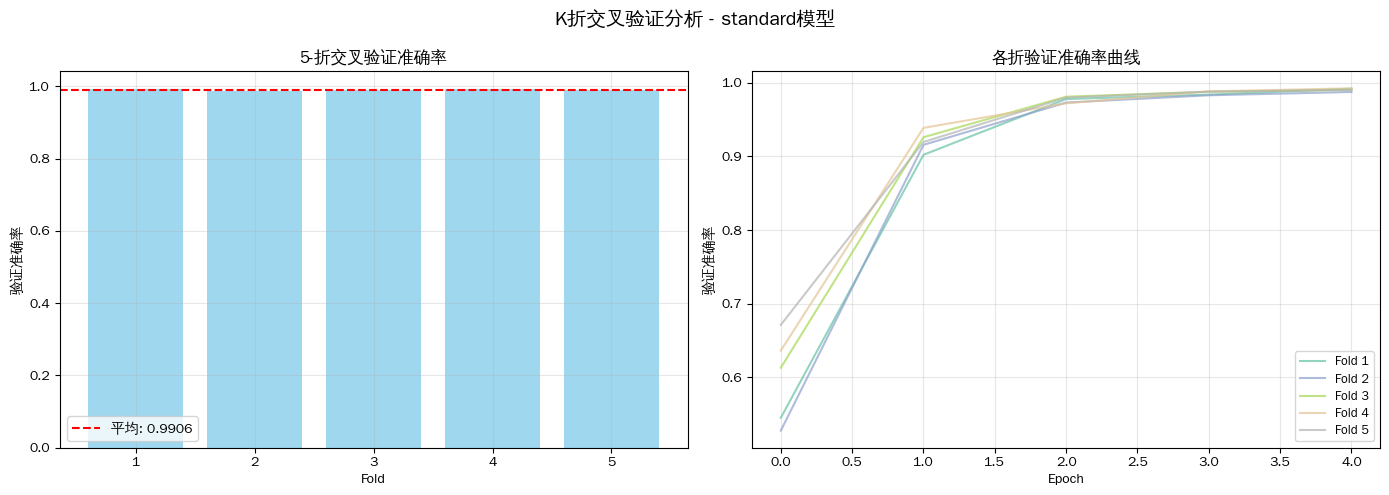

详细训练曲线图已保存: /home/aistudio/work/hyperparameter_tuning_result/detailed_training_curves.png


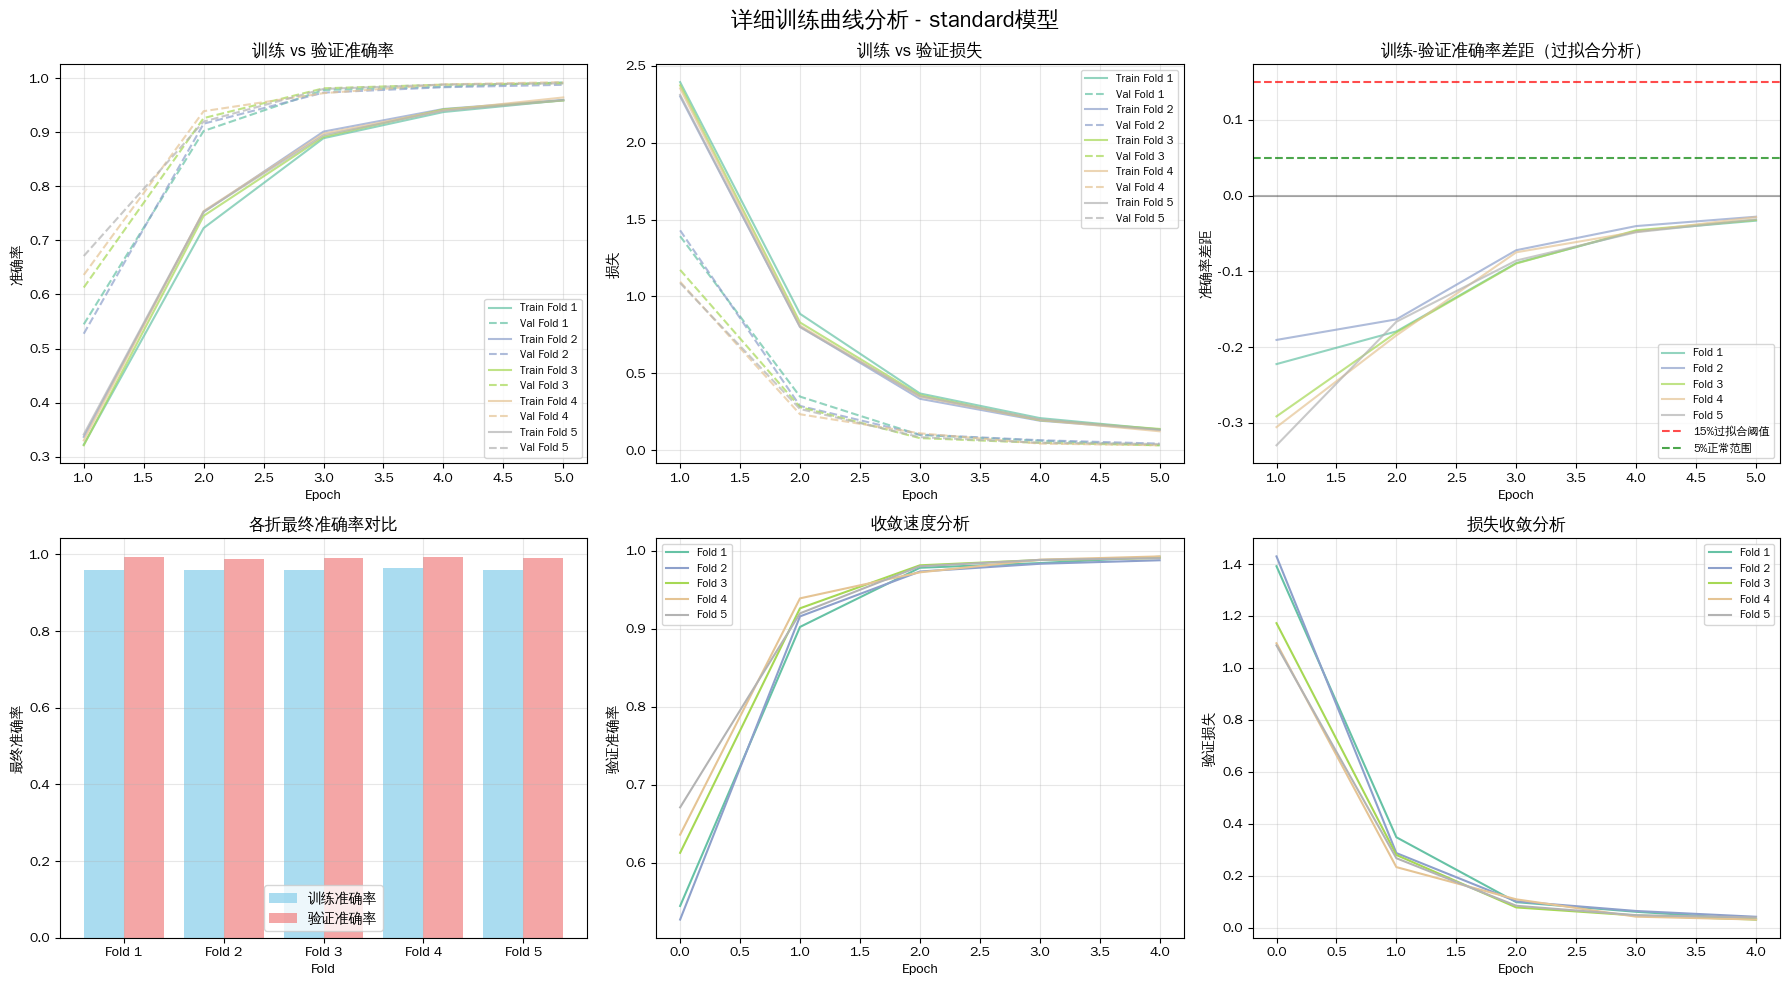

In [ ]:
import os
import sys
import matplotlib
def setup_chinese_font():
    """设置中文字体"""
    try:
        import matplotlib.font_manager as fm

        # 获取系统中已安装的字体
        available_fonts = [f.name for f in fm.fontManager.ttflist]

        # 检查文泉驿中文字体
        if any('WenQuanYi' in font for font in available_fonts):
            matplotlib.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei', 'WenQuanYi Micro Hei', 'DejaVu Sans']
            print("使用文泉驿中文字体")
        elif any('SimHei' in font for font in available_fonts):
            matplotlib.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS']
            print("使用SimHei中文字体")
        else:
            matplotlib.rcParams['font.sans-serif'] = ['DejaVu Sans']
            print("使用英文字体")

        matplotlib.rcParams['axes.unicode_minus'] = False
        return True

    except Exception as e:
        print(f"字体设置失败: {e}")
        matplotlib.rcParams['font.sans-serif'] = ['DejaVu Sans']
        matplotlib.rcParams['axes.unicode_minus'] = False
        return False

setup_chinese_font()

# 添加work目录到系统路径
sys.path.append('.')

# 导入主函数
from hyperparameter_tuning_final import main

# 直接调用主函数
main()